# ENPM 662: Introductiton to Robot Modelling
## Homework 5: Dynamics of KUKA WIIA Force Control
* Name: Aswath Muthuselvam
* UID: 118286204 
* Section: 201


Step 1: Forward Velocity Kinematic Equation

In [1]:

from sympy import *
import math

t1, t2, t3, t4, t5, t6, t7, d1, d3, d5, d7 = symbols('t1 t2 t3 t4 t5 t6 t7 d1 d3 d5 d7')
d1 = 40
d3 = 42
d5 = 39.95
d7 = 10.55
t3=0
pen =10
T01 = Matrix([[cos(t1), 0, -sin(t1), 0], 
            [sin(t1), 0, cos(t1), 0], 
            [0, -1, 0, d1], 
            [0, 0, 0, 1]])

T12 = Matrix([[cos(t2), 0, sin(t2), 0], 
            [sin(t2), 0, -cos(t2), 0], 
            [0, 1, 0, 0], 
            [0, 0, 0, 1]])

T23 = Matrix([[cos(t3), 0, sin(t3), 0],
             [sin(t3), 0, -cos(t3), 0],
             [0, 1, 0, d3],
             [0, 0, 0, 1]])

T34 = Matrix([[cos(t4), 0, -sin(t4), 0],
             [sin(t4), 0, cos(t4), 0],
             [0, -1, 0, 0],
             [0, 0, 0, 1]])

T45 = Matrix([[cos(t5), 0, -sin(t5), 0],
             [sin(t5), 0, cos(t5), 0],
             [0, -1, 0, d5],
             [0, 0, 0, 1]])

T56 = Matrix([[cos(t6), 0, sin(t6), 0],
             [sin(t6), 0, -cos(t6), 0],
             [0, 1, 0, 0],
             [0, 0, 0, 1]])

T67 = Matrix([[cos(t7), -sin(t7), 0, 0],
             [sin(t7), cos(t7), 0, 0],
             [0, 0, 1, d7+pen],
             [0, 0, 0, 1]])

T07 = (T01*T12*T23*T34*T45*T56*T67)

print("Transformation Matrix T07: ")
T07


Transformation Matrix T07: 


Matrix([
[(((sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t1)*sin(t5))*cos(t6) + (-sin(t2)*cos(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*sin(t6))*cos(t7) + (-(sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - sin(t1)*cos(t5))*sin(t7), -(((sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t1)*sin(t5))*cos(t6) + (-sin(t2)*cos(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*sin(t6))*sin(t7) + (-(sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - sin(t1)*cos(t5))*cos(t7), ((sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t1)*sin(t5))*sin(t6) - (-sin(t2)*cos(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*cos(t6), 20.55*((sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - sin(t1)*sin(t5))*sin(t6) - 20.55*(-sin(t2)*cos(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*cos(t6) + 39.95*sin(t2)*cos(t1)*cos(t4) + 42*sin(t2)*cos(t1) - 39.95*sin(t4)*cos(t1)*cos(t2)],
[(((sin(t1)*sin(t2)*sin(t4) + sin(t1)*cos(t2)*cos(t4))*cos(t5) + sin(t5)*cos(t1))

In [2]:

x = T07[0,3]
y = T07[1,3]
z = T07[2,3]

T02 = T01 * T12
T03 = T02 * T23
T04 = T03 * T34
T05 = T04 * T45
T06 = T05 * T56
import numpy as np
z0 = Matrix([[0],[0],[1]])
z1 = T01[0:3,2]
z2 = T02[0:3,2]
z3 = T03[0:3,2]
z4 = T04[0:3,2]
z5 = T05[0:3,2]
z6 = T06[0:3,2]

#t = T
#a
#p

'''
J = Matrix( [[diff(x,t1), diff(x,t2), diff(x,t3), diff(x,t4), diff(x,t5), diff(x,t6), diff(x,t7)],
            [diff(y,t1),  diff(y,t2), diff(y,t3), diff(y,t4), diff(y,t5), diff(y,t6), diff(y,t7)],
            [diff(z,t1),  diff(z,t2), diff(z,t3), diff(z,t4), diff(z,t5), diff(z,t6), diff(z,t7)], 
            [z0, z1, z2, z3, z4, z5, z6]] )
'''

# Since joint 3 is locked, we can remove it from the Jacobian matrix.
J = Matrix( [[diff(x,t1), diff(x,t2), diff(x,t4), diff(x,t5), diff(x,t6), diff(x,t7)],
            [diff(y,t1),  diff(y,t2), diff(y,t4), diff(y,t5), diff(y,t6), diff(y,t7)],
            [diff(z,t1),  diff(z,t2), diff(z,t4), diff(z,t5), diff(z,t6), diff(z,t7)], 
            [z0, z1, z2, z4, z5, z6]] )

J

Matrix([
[(20.55*(-sin(t1)*sin(t2)*sin(t4) - sin(t1)*cos(t2)*cos(t4))*cos(t5) - 20.55*sin(t5)*cos(t1))*sin(t6) + (-20.55*sin(t1)*sin(t2)*cos(t4) + 20.55*sin(t1)*sin(t4)*cos(t2))*cos(t6) - 39.95*sin(t1)*sin(t2)*cos(t4) - 42*sin(t1)*sin(t2) + 39.95*sin(t1)*sin(t4)*cos(t2), (20.55*sin(t2)*sin(t4)*cos(t1) + 20.55*cos(t1)*cos(t2)*cos(t4))*cos(t6) + 20.55*(-sin(t2)*cos(t1)*cos(t4) + sin(t4)*cos(t1)*cos(t2))*sin(t6)*cos(t5) + 39.95*sin(t2)*sin(t4)*cos(t1) + 39.95*cos(t1)*cos(t2)*cos(t4) + 42*cos(t1)*cos(t2), (-20.55*sin(t2)*sin(t4)*cos(t1) - 20.55*cos(t1)*cos(t2)*cos(t4))*cos(t6) + 20.55*(sin(t2)*cos(t1)*cos(t4) - sin(t4)*cos(t1)*cos(t2))*sin(t6)*cos(t5) - 39.95*sin(t2)*sin(t4)*cos(t1) - 39.95*cos(t1)*cos(t2)*cos(t4), (-20.55*(sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*sin(t5) - 20.55*sin(t1)*cos(t5))*sin(t6), (20.55*(sin(t2)*sin(t4)*cos(t1) + cos(t1)*cos(t2)*cos(t4))*cos(t5) - 20.55*sin(t1)*sin(t5))*cos(t6) - (20.55*sin(t2)*cos(t1)*cos(t4) - 20.55*sin(t4)*cos(t1)*cos(t2))*sin(t6),   

0 0 142.500000000000


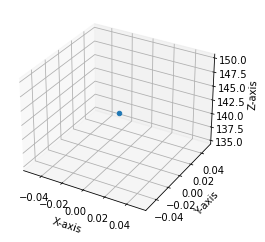

In [3]:
#ARM at zero configuration:
import matplotlib.pyplot as plt
%matplotlib inline

import time
import pylab as pl
from IPython import display

#Sample Jacobian inverse calculation:
def rads(x):
    return math.radians(x)

#q = q1 q2 q4 q5 q6 q7
#End effector at home position:
q3 = 0
q = Matrix([ [rads(0)], [rads(0)], [rads(0)], [rads(0)], [rads(0)], [rads(0)]])
Tr = T07.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})

ax = plt.axes(projection='3d')
x = Tr[0,3].evalf()
y = Tr[1,3].evalf()
z = Tr[2,3].evalf()

print(x,y,z)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.scatter3D(x, y, z,cmap='Greens')


In [4]:
#Sample Jacobian inverse calculation:
q = Matrix([ [rads(0.1)], [rads(0.1)], [rads(0.1)], [rads(0.1)], [rads(0.1)], [rads(0.1)]])
Js = J.subs({t1: q[0], t2: q[1], t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
Jp = ((Js.T*Js)).inv()*Js.T
Jp

Matrix([
[  -0.0238094869532794,     13.6418384125239, 4.08260412613146e-5,     280.339352349355,   0.48928568269502,   -0.489284969051369],
[  -0.0239807372636278, -4.18543116325054e-5,   -40.4511530003189,  0.00420427680860413, -0.958028955054528, -1.50116875374806e-6],
[  -0.0490119499299908, -8.55420589687128e-5,   -54.7929676973492,  0.00510205374025752, -0.958025853515146, -3.06809579342371e-6],
[-0.000171139967278577,    -13.6418802651321,   -40.4510487471722,    -853.288870674693,  -3.44730562645907,     1.48928346781759],
[   0.0239805515084299,  4.18539873692225e-5,    40.4509244809105, -0.00769490627902147,      1.95801848524,  1.50115738506429e-6],
[   0.0729926132771652, 0.000127394730384367,    95.2440372289667,     572.945288924725,   3.91605030260695,  4.56930138170719e-6]])

In [10]:
def clamp(n, minn, maxn):
    return max(min(maxn, n), minn)
    
def drawArm(ax,q):
    global T01, T02, T03, T04, T05, T06, T07, q3, q7
    #Ts = T substituted
    Ts01 = T01.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts02 = T02.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts03 = T03.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts04 = T04.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts05 = T05.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts06 = T06.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Ts07 = T07.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    ax.plot3D([0, Ts01[0,3] ],[0,Ts01[1,3]],[0,Ts01[2,3]],'violet')
    ax.plot3D( [Ts01[0,3], Ts02[0,3] ], [ Ts01[1,3], Ts02[1,3] ], [Ts01[2,3] ,Ts02[2,3]],'indigo')
    ax.plot3D( [Ts02[0,3], Ts03[0,3] ], [ Ts02[1,3], Ts03[1,3] ], [Ts02[2,3] ,Ts03[2,3]],'blue')
    ax.plot3D( [Ts03[0,3], Ts04[0,3] ], [ Ts03[1,3], Ts04[1,3] ], [Ts03[2,3] ,Ts04[2,3]],'green')
    ax.plot3D( [Ts04[0,3], Ts05[0,3] ], [ Ts04[1,3], Ts05[1,3] ], [Ts04[2,3] ,Ts05[2,3]],'yellow')
    ax.plot3D( [Ts05[0,3], Ts06[0,3] ], [ Ts05[1,3], Ts06[1,3] ], [Ts05[2,3] ,Ts06[2,3]],'orange')
    ax.plot3D( [Ts06[0,3], Ts07[0,3] ], [ Ts06[1,3], Ts07[1,3] ], [Ts06[2,3] ,Ts07[2,3]],'red')

import numpy as np
def formCircle(xc, yc, zc, r, s):
    theta= np.linspace(2 * 3.14, 0, s)             
    x, z= [], []
    for i in theta:
        x.append(r * sin(i) + xc)           
        z.append(r * cos(i) + zc)           
    y = np.ones(s) * yc
    return x, y, z


#ald = derivative of alpha, angular velocity
#angular velocity = 2*pi / Target Time 

#Given Radius is 10 cm 
r = 10

#Drawing the circle in 200 seconds
angvel = (2*3.14) / 200
print("Maximum End-effector velocity: ",angvel)

Maximum End-effector velocity:  0.031400000000000004



### Circle equation:
$$
x= r*cos(\alpha) \\
y= r*sin(\alpha)
$$

### Velocity of End effector along the circle:
$$
dx/dt = -r*sin(\alpha)*d(\alpha)/dt \\
dy/dt = r*cos(\alpha)*d(\alpha)/dt 
$$


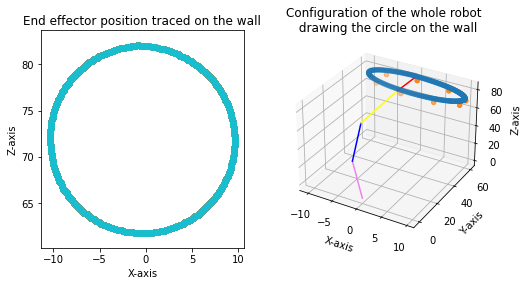

dq:  Matrix([[0.00794491026166924], [6.90877523561451e-5], [6.18558188887800e-5], [-0.208510552460859], [0.00338864606612405], [0.208549226975848]])
End-effector(x,y,z):  -0.559655996554409 60.2229912297722 82.0404701674025
Alpha :  7.882196326794861


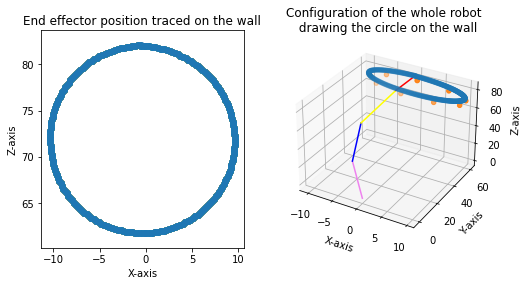

In [11]:

#Settings:
#1. Set limits on joint angles in each time step:
SETLIMITS = False

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
ax.axis('equal')
ax.set_title('End effector position traced on the wall')

ax3 = fig.add_subplot(1, 2, 2, projection='3d')
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')
ax3.set_zlabel('Z-axis')
ax3.axis('auto')
ax3.set_title('Configuration of the whole robot \n drawing the circle on the wall')

time.sleep(1)

xci,yci,zci = formCircle(0, 60, 68, 10, 10)

count = 0

#al = alpha
al = np.pi/2

xl = []
yl = []
zl = []
#Starting from Home position q = [90 0 -90 0 0 0]
#Since joint 3 is locked, we will assign it with variable q3=-90
q3=rads(-90)

q = Matrix([ [rads(90.0001)], [rads(0.00001)], [rads(-90.0001)], [rads(0.00001)], [rads(0.00001)],  [rads(0.0001)]])
Js = J.subs({t1: q[0], t2: q[1], t4: q[2], t5: q[3], t6: q[4], t7: q[5]})

q_ = Matrix([ [rads(0)], [rads(0)], [rads(0)], [rads(0)], [rads(0)], [rads(0)]])
qlist=[q]
while(al< 2*np.pi + np.pi/2):
    Js = J.subs({t1: q[0], t2: q[1], t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    try:
        #Using Jacobian Pseudo-inverse, in case Jacobian is non square matrix.
        #Jp = ((Js.T*Js)).inv()*Js.T

        #Using direct inverse, in our case, the Jacobian is a square matrix, 
        # hence inverse can be taken directly.
        Jp = Js.inv()
    except:
        q = (q + q_).evalf()
        print("Singularity / rank-loss")
        continue
    
    #Step 2: inverse velocity kinematics problem that generates joint velocities for a circle
    #Circle equation:
    Vx = -r*sin(al)*angvel
    Vz = r*cos(al)*angvel
    al = al+ angvel

    #V is the end effector's desiered linear velocity and angular velocity of end effector rotation.
    # V = [vx, vy, vz, roll', pitch', yaw'] 
    V = Matrix([ [Vx], [0], [Vz], [0], [0], [0]])
    q_=Jp*V
    
    i=0
    while(i<len(q_) and SETLIMITS):
        q_[i] = clamp(q_[i],-1,1)
        i+=1

    q = (q + q_).evalf()
    qlist.append(q)
    
    #Step 3: Plug in the join velocities generated in Step 2 to forward velocity kinematics developed in Step 
    # 1 and plot output of the inverse kinematics problem that should be a circle as specified in Figure 1 
    Tr = T07.subs({t1: q[0], t2: q[1], t3: q3, t4: q[2], t5: q[3], t6: q[4], t7: q[5] })
    x = Tr[0,3].evalf()
    y = Tr[1,3].evalf()
    z = Tr[2,3].evalf()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print("dq: ",q_)
    print("End-effector(x,y,z): ", x,y,z)
    print("Alpha : ", al)

    # Visualize 
    #--------------------
    xl.append(x)
    yl.append(y)
    zl.append(z)
    
    #X-Z plane plot
    ax.scatter(xl,zl)

    # 3D plot
    ax3.cla()
    ax3.scatter3D(xl, yl, zl,cmap='Black')
    ax3.scatter3D(xci, yci, zci, 'r')
    drawArm(ax3,q)
    ax3.set_xlabel('X-axis')
    ax3.set_ylabel('Y-axis')
    ax3.set_zlabel('Z-axis')
    ax3.set_title('Configuration of the whole robot \n drawing the circle on the wall')
    #--------------------

    time.sleep(0.1)
    count +=1 


plt.show()


# Problems faced:
1. The home position of end effector and the starting point of the part of circle matters, different 'alpha' yields distorted circle.
2. Each x,y,z equation needs to be evaluated numerically before computing inverse Jacobian, else, it gets stuck in an infinite loop.
3. Singualrity is reached if the 'even digit' joint angles are exactly equal to 0

# Homework 5:
Step 1- Python code that parametrically calculates matrix g(q) \
Step 2- Python code that parametrically calculates total joint torque (gravity +
external force) \
Step 3- If robot draws the circle in 200 seconds, plot the joint torques required
over time (between t=0 and t=200 s). (Plot 6 graphs. One of each joint: 1,2, 4, 5,
6, and 7) 

Mass of the arms are obtained from this [paper](https://www.research-collection.ethz.ch/bitstream/handle/20.500.11850/237831/2/IFAC2017_KUKA_Identification.pdf)

In [12]:
#Find Torque due to gravity
#Tau = r x F
import numpy as np

g=9.8
M1 = 3.94781
M2 = 4.50275
M4 = 2.45200 + 2.61155
M5 = 3.41
M6 = 3.38795
M7 = 0.35432

# Assuming COM lies at joints
Tau1 = T01[0:3,3].cross(Matrix([0,0,-M1*g])) + \
        T02[0:3,3].cross(Matrix([0,0,-M2*g])) + \
        T04[0:3,3].cross(Matrix([0,0,-M4*g])) + \
        T05[0:3,3].cross(Matrix([0,0,-M5*g])) + \
        T06[0:3,3].cross(Matrix([0,0,-M6*g])) + \
        T07[0:3,3].cross(Matrix([0,0,-M7*g]))

T14 = T12*T23*T34
T15 = T14*T45
T16 = T15*T56
T17 = T16*T67

Tau2 = T12[0:3,3].cross(Matrix([0,0,-M2*g])) + \
    T14[0:3,3].cross(Matrix([0,0,-M4*g])) + \
    T15[0:3,3].cross(Matrix([0,0,-M5*g])) + \
    T16[0:3,3].cross(Matrix([0,0,-M6*g])) + \
    T17[0:3,3].cross(Matrix([0,0,-M7*g]))

T24 = T23*T34
T25 = T24*T45
T26 = T25*T56
T27 = T26*T67
Tau4 = T24[0:3,3].cross(Matrix([0,0,-M4*g])) + \
    T25[0:3,3].cross(Matrix([0,0,-M5*g])) + \
    T26[0:3,3].cross(Matrix([0,0,-M6*g])) + \
    T27[0:3,3].cross(Matrix([0,0,-M7*g]))

T46 = T45*T56
T47 = T46*T67
Tau5 = T45[0:3,3].cross(Matrix([0,0,-M5*g])) + \
    T46[0:3,3].cross(Matrix([0,0,-M6*g])) + \
    T47[0:3,3].cross(Matrix([0,0,-M7*g]))

T57 = T56*T67
Tau6 = T56[0:3,3].cross(Matrix([0,0,-M6*g])) + \
    T57[0:3,3].cross(Matrix([0,0,-M7*g]))
    
Tau7 = T67[0:3,3].cross(Matrix([0,0,-M7*g]))

# G(q) matrix:
G_q = Matrix([Tau1[2], Tau2[2], Tau4[2], Tau5[2], Tau6[2], Tau7[2]]) 

#Find Torque needed for external force
Tau = []
for q in qlist:
    Fx = 0
    Fy = 5
    Fz = 0
    F_ext = Matrix([Fx, Fy, Fz, 0, 0, 0])
    Js = J.subs({t1: q[0], t2: q[1], t4: q[2], t5: q[3], t6: q[4], t7: q[5]})
    Tau_ext = Js.inv()*F_ext
    Tau.append(Tau_ext + G_q) 


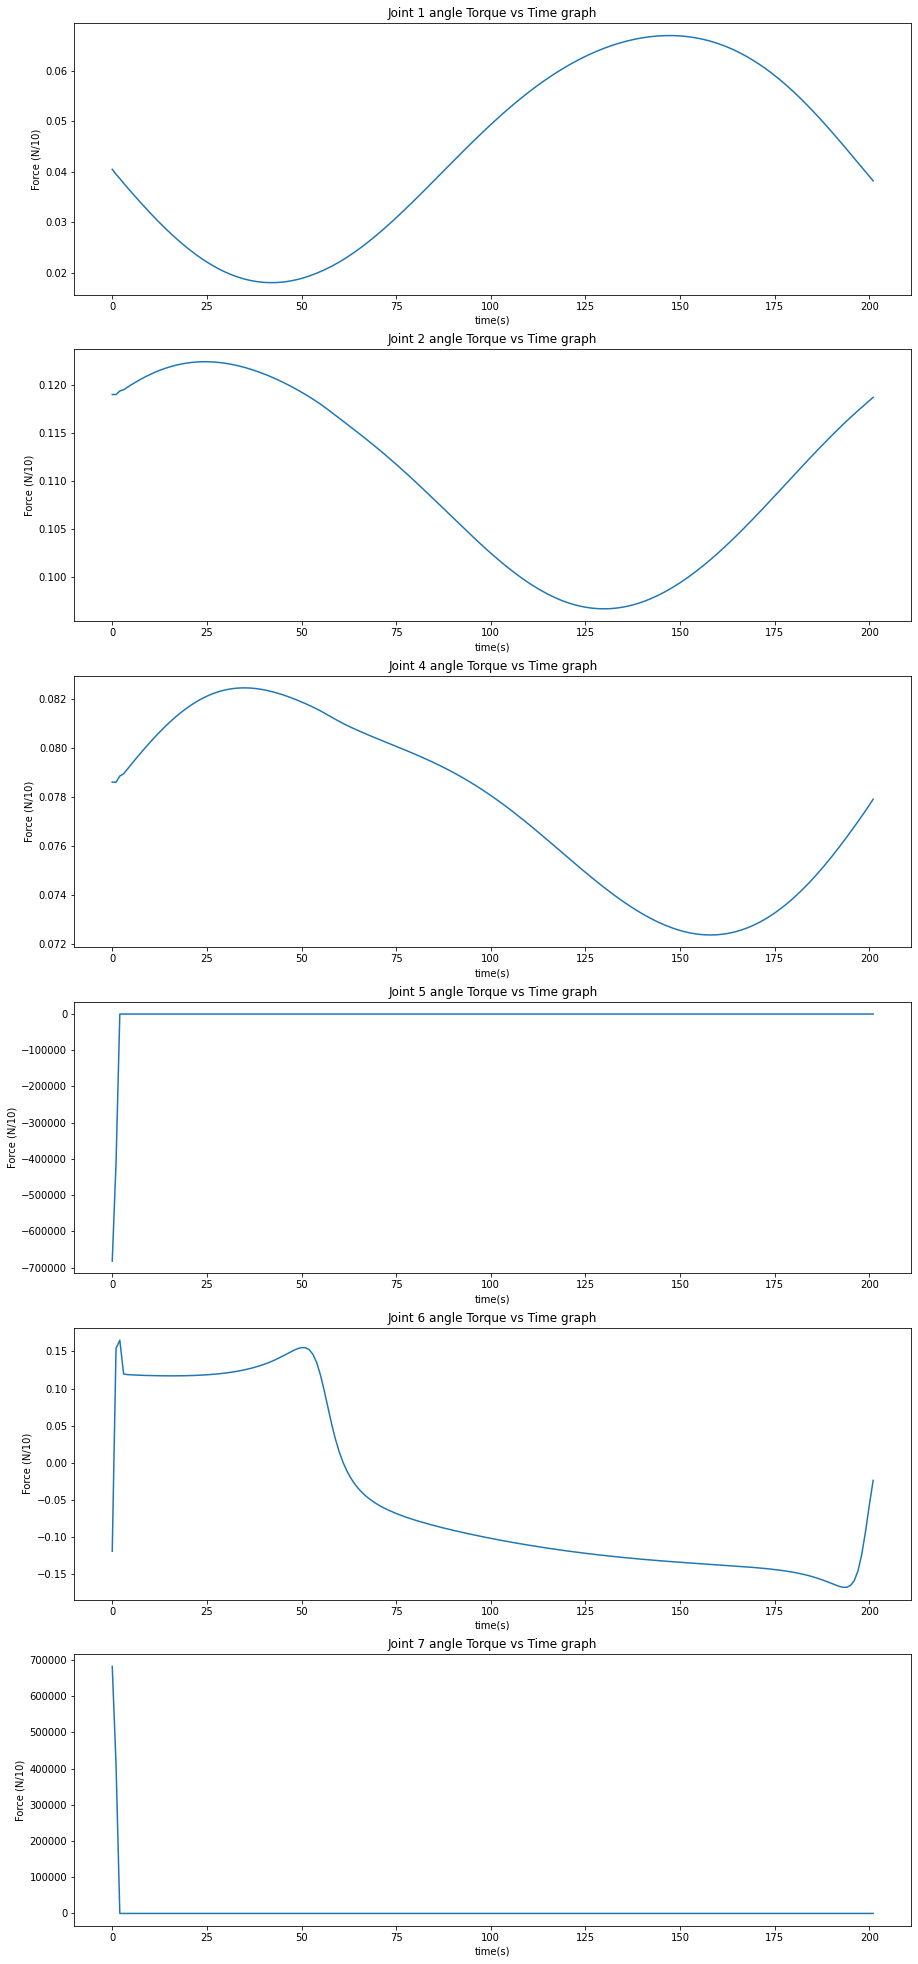

In [14]:
f,plts = plt.subplots(6,1,figsize=(15,35))

plts[0].plot(np.array(Tau)[:,0])
plts[0].set
plts[1].plot(np.array(Tau)[:,1])
plts[2].plot(np.array(Tau)[:,2])
plts[3].plot(np.array(Tau)[:,3])
plts[4].plot(np.array(Tau)[:,4])
plts[5].plot(np.array(Tau)[:,5])

i=1
for ax in plts.flat:
    ax.set(xlabel='time(s)', ylabel='Force (N/10)')
    if(i==3): 
        i = i+1
    ax.set_title("Joint " + str(i) + " angle Torque vs Time graph")
    i=i+1
